<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [19]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [20]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


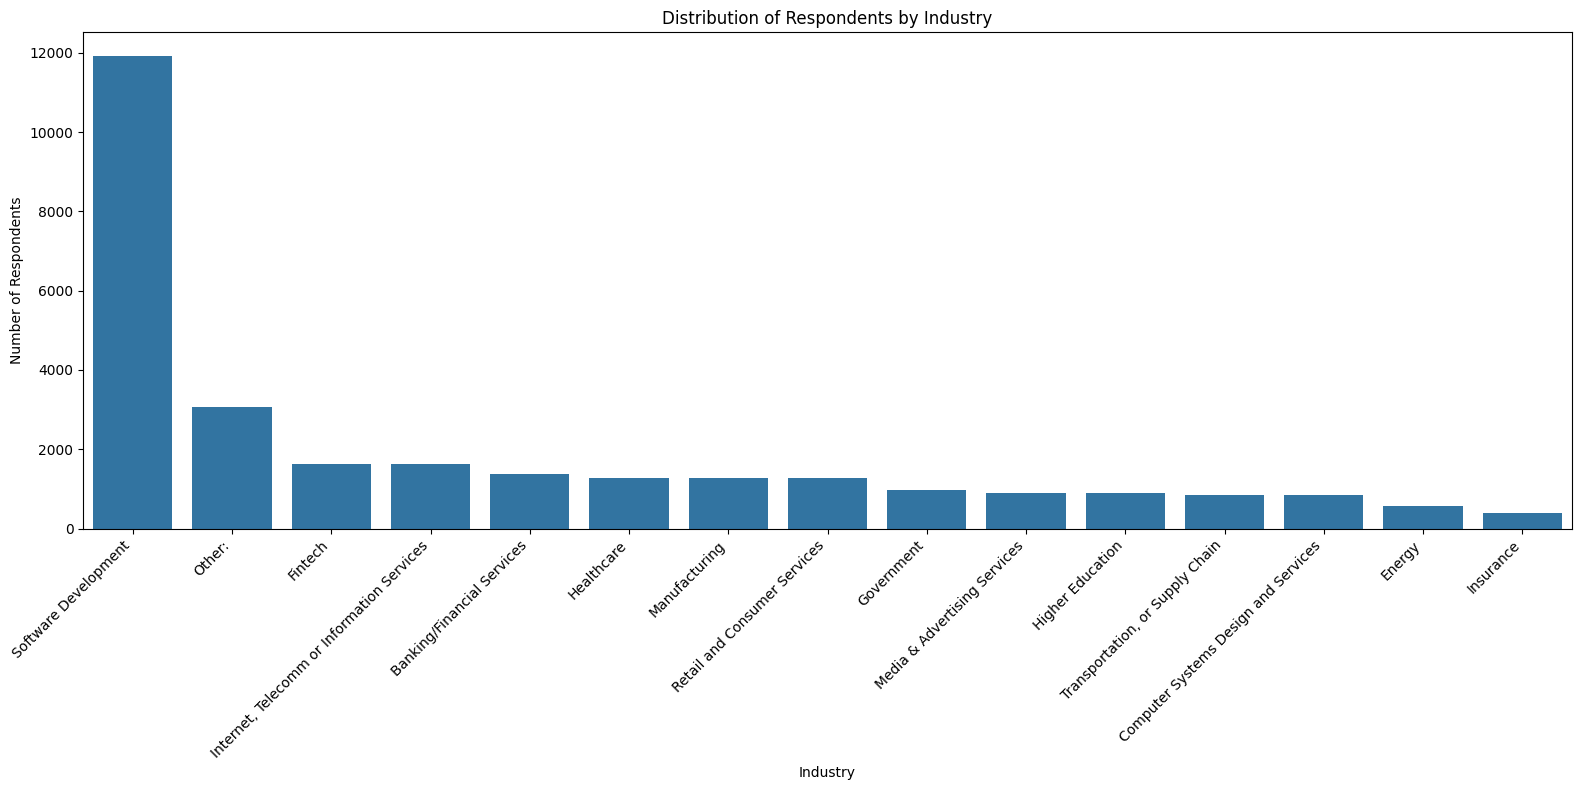

In [21]:
# Show the distribution of 'Industry' in a bar plot
plt.figure(figsize=(16, 8))  # Adjust figure size for better readability
industry_counts = df['Industry'].value_counts()
sns.barplot(x=industry_counts.index, y=industry_counts.values, legend=False)
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [22]:
# Calculate mean, median and std deviation of ConvertedCompYearly
mean_val = df['ConvertedCompYearly'].mean()
median_val = df['ConvertedCompYearly'].median()
std_val = df['ConvertedCompYearly'].std()

print('\nThe mean value is: ', mean_val)
print('\nThe median value is: ', median_val)
print('\nThe standad deviation is: ', std_val)

# Identify outliers using 3 standard deviations above the mean
outlier_threshold = mean_val + (3 * std_val)
high_comp_outliers = df[df['ConvertedCompYearly'] > outlier_threshold]

print(f"\nNumber of high compensation outliers (>{outlier_threshold}): {len(high_comp_outliers)}")
print("\nHigh Compensation Outliers:")
print(high_comp_outliers[['ResponseId', 'ConvertedCompYearly', 'Country']])


The mean value is:  86155.28726264134

The median value is:  65000.0

The standad deviation is:  186756.97308629757

Number of high compensation outliers (>646426.2065215341): 89

High Compensation Outliers:
       ResponseId  ConvertedCompYearly                   Country
529           530             650000.0  United States of America
828           829            1000000.0  United States of America
1932         1933             945000.0  United States of America
2171         2172             750000.0  United States of America
2187         2188            2000000.0                     Gabon
...           ...                  ...                       ...
38219       38220            1000000.0                    Poland
39643       39644            1300000.0  United States of America
40066       40067             800000.0  United States of America
40952       40953             750000.0  United States of America
41027       41028             700000.0  United States of America

[89 rows x

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Number of outliers: 978
Lower Bound: -80177.25
Upper Bound: 220860.75


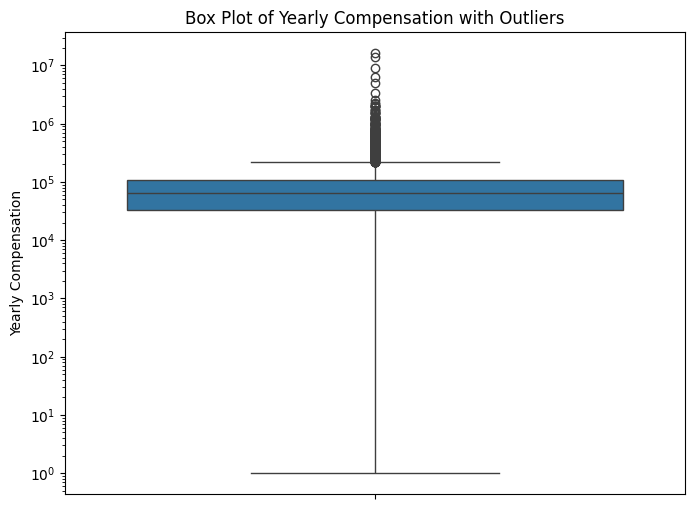

In [23]:
# Calculate quartiles and IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Count outliers
num_outliers = len(outliers)
print(f"Number of outliers: {num_outliers}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Visualize outliers with a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y='ConvertedCompYearly', data=df)
plt.title('Box Plot of Yearly Compensation with Outliers')
plt.ylabel('Yearly Compensation')
plt.yscale('log') # Use logarithmic scale for better visualization of spread
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


Original DataFrame size: 23435
DataFrame size after removing outliers: 22457


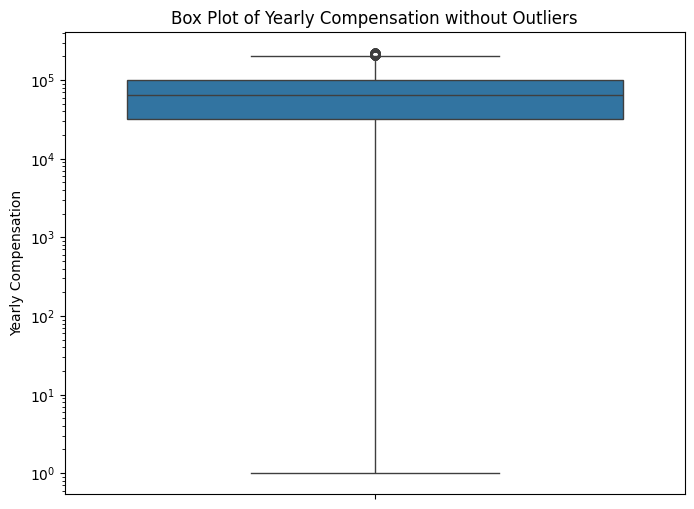

In [24]:
# Remove negative compensation values
df = df[df['ConvertedCompYearly'] >= 0]

# Recalculate quartiles and IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame which excludes outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
print(f"Original DataFrame size: {len(df)}")
print(f"DataFrame size after removing outliers: {len(df_no_outliers)}")

# Visualize the data without outliers with a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y='ConvertedCompYearly', data=df_no_outliers)
plt.title('Box Plot of Yearly Compensation without Outliers')
plt.ylabel('Yearly Compensation')
plt.yscale('log') # Use logarithmic scale for better visualization of spread
plt.show()

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [25]:
# Map the Age column to approximate numeric values using a dictionary
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 20.5,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 69.5,
    'Prefer not to say': None
}
# Replace values using the dictionary
df['Age'] = df['Age'].replace(age_mapping)

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.append(pd.Index(['Age']))

# Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix
print(correlation_matrix)


                     ResponseId       Age  CompTotal   WorkExp  \
ResponseId             1.000000 -0.042129   0.001336 -0.039272   
Age                   -0.042129  1.000000  -0.003896  0.846326   
CompTotal              0.001336 -0.003896   1.000000 -0.004885   
WorkExp               -0.039272  0.846326  -0.004885  1.000000   
JobSatPoints_1         0.014210 -0.035869   0.025222 -0.028839   
JobSatPoints_4         0.001887 -0.071551   0.006603 -0.058504   
JobSatPoints_5         0.007027 -0.098812   0.017022 -0.096626   
JobSatPoints_6         0.007865 -0.053537   0.019909 -0.066387   
JobSatPoints_7         0.019090 -0.088201   0.033172 -0.102817   
JobSatPoints_8         0.005672 -0.052328   0.019578 -0.048650   
JobSatPoints_9         0.020811 -0.086670   0.002968 -0.091732   
JobSatPoints_10        0.012469 -0.115859   0.007573 -0.110805   
JobSatPoints_11        0.011671 -0.108566   0.022402 -0.103907   
ConvertedCompYearly   -0.008363  0.122076   0.080457  0.154114   
JobSat    

/tmp/ipykernel_191/3622352260.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age'] = df['Age'].replace(age_mapping)


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
